In [137]:
import numpy as np 
import matplotlib.pyplot as plt


$R^2$ (s) = $\frac{1}{s(s-1)}$ $\sum_{i =/= j}$ ($r_{i}$ - $r_{j}$)$^2$ 

where $i$ and $j$ are the number of particles of the cluster and r$_{i}$ is the position of the $i$th atom on the lattice

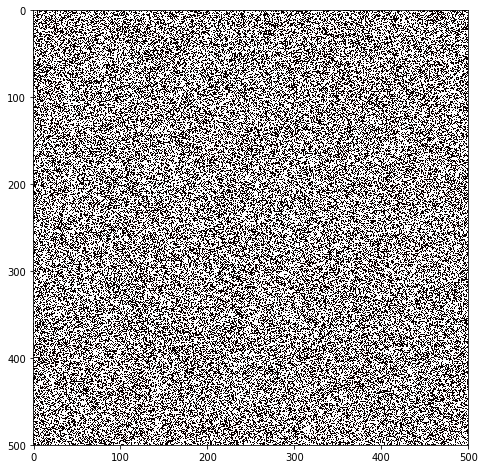

In [138]:
N = 500
p = 0.59275
#np.random.seed(69)
L = np.random.random([N,N])
plt.rcParams["figure.figsize"] = [16,8]
plt.imshow(L < p, cmap = 'hot')

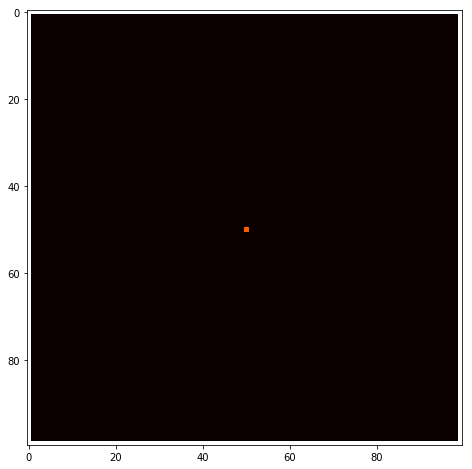

In [139]:
N = 100
lattice = np.zeros((N,N))
'occupy the center'
lattice[N//2,N//2]=1
lattice[:,0] = lattice[0,:] = lattice[:,-1] = lattice[-1,:] = 2
plt.imshow(lattice, cmap = "hot")

In [ ]:
def nextstep(x,y):

    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y

def percolatingcluster(N,iterations):
    count = 1
    x = y = 0
    p = 0.59275
    for i in range(iterations):
        r = np.random.random()
        x,y = nextstep(x,y)
        if np.abs(N//2+x) < N and np.abs(N//2+y) < N:
            if lattice[N//2 + x][N//2 + y] == 0:
                if r < p: 
                    lattice[N//2 + x][N//2 + y] = 1
                    count +=1
                else: lattice[N//2 + x][N//2 + y] = 2
            else: 
                continue
    
    print(count)
    plt.imshow(lattice,cmap ='hot')
    plt.show()

percolatingcluster(100,10)

In [ ]:
for i in range(N):
    for j in range(N):
        start = (N//2,N//2)
        x=(N//2)
        y=(N//2)
       

trial 0
p=  0.0
trial 1
p=  0.0
trial 2
p=  0.0
trial 3
p=  0.0
trial 4
p=  0.0
trial 0
p=  0.1


C:\Users\Rene\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Rene\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


trial 1
p=  0.1
trial 2
p=  0.1
trial 3
p=  0.1
trial 4
p=  0.1
trial 0
p=  0.2
trial 1
p=  0.2
trial 2
p=  0.2
trial 3
p=  0.2
trial 4
p=  0.2
trial 0
p=  0.30000000000000004
trial 1
p=  0.30000000000000004
trial 2
p=  0.30000000000000004
trial 3
p=  0.30000000000000004
trial 4
p=  0.30000000000000004
trial 0
p=  0.4
trial 1
p=  0.4
trial 2
p=  0.4
trial 3
p=  0.4
trial 4
p=  0.4
trial 0
p=  0.5
trial 1
p=  0.5
trial 2
p=  0.5
trial 3
p=  0.5
trial 4
p=  0.5
trial 0
p=  0.6000000000000001
trial 1
p=  0.6000000000000001
trial 2
p=  0.6000000000000001
trial 3
p=  0.6000000000000001
trial 4
p=  0.6000000000000001
trial 0
p=  0.7000000000000001
trial 1
p=  0.7000000000000001
trial 2
p=  0.7000000000000001
trial 3
p=  0.7000000000000001
trial 4
p=  0.7000000000000001
trial 0
p=  0.8
trial 1
p=  0.8
trial 2
p=  0.8
trial 3
p=  0.8
trial 4
p=  0.8
trial 0
p=  0.9
trial 1
p=  0.9
trial 2
p=  0.9
trial 3
p=  0.9
trial 4
p=  0.9


C:\Users\Rene\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


p_c=  []


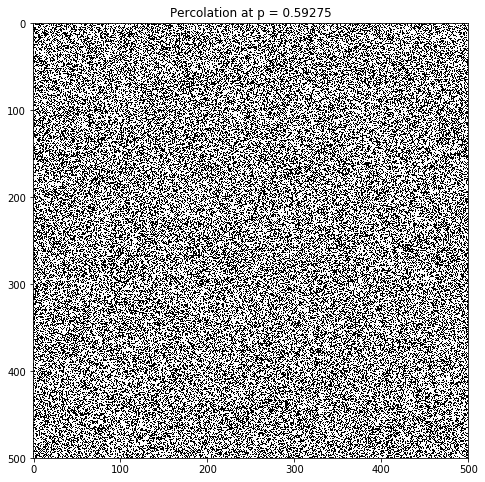

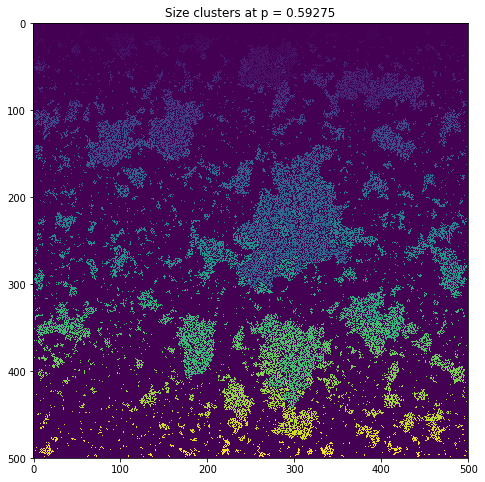

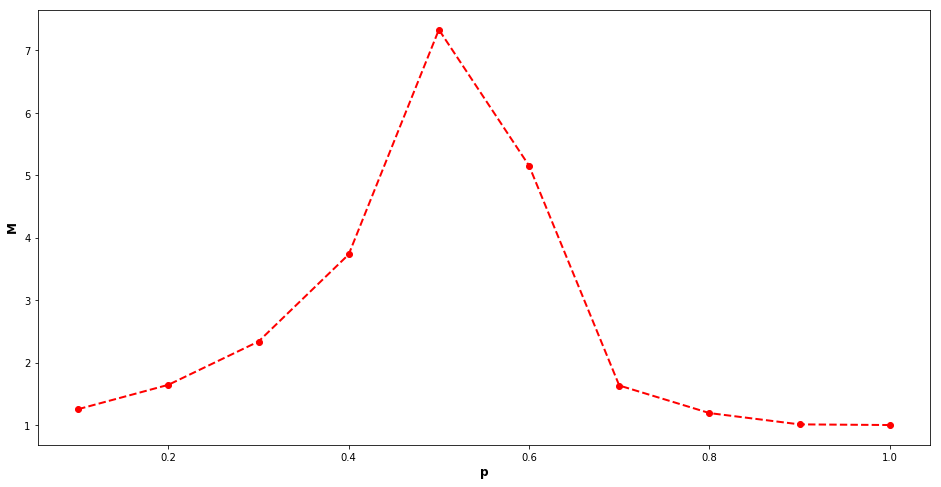

In [136]:
"""

Code for Percolation (W.Kinzel/G.Reents, Physics by Computer)
Simulate percolation and label clusters using the Hoshen-Kopelman algorithm
NOTE: This code takes a really long time to finish running.

"""

import numpy as np
import matplotlib.pyplot as plt

class Percolation(object):

    #Create a lattice
    def lattice(self,L,p): 
        return (np.random.random([L,L])<p)*1
    
    #Count the number and size of percolating clusters
    def mass(self,label): 
        elements, counts = np.unique(label, return_counts = 1)      
        return np.mean(counts[elements!=0])

    #Hoshen-Kopelman algorithm
    def labelling(self, n, p): #Create the clusters and label them
        a = self.lattice(n,p)
        label = np.zeros_like(a, dtype = int)
        label[:,0] = a[:,0]*-1
        label[0,:] = a[0,:]*-1
        label[:,n-1] = a[:,n-1]*-1
        label[n-1,:] = a[n-1,:]*-1
        for i in range(1,n-1):
            for j in range(1,n-1):
                if a[i,j]: #if occupied
                    if a[i-1, j] and not(a[i,j-1]): #up
                        label[i,j] = label[i-1,j]
                    elif a[i, j-1] and not(a[i-1, j]):
                        label[i,j] = label[i, j-1]
                    elif not(a[i,j-1]) and not(a[i-1, j]):
                        label[i,j] = np.max(label) + 1
                    elif a[i-1, j] and a[i, j-1]:
                        if label[i-1,j] < label[i, j-1]:
                            label[i,j] = label[i-1,j]
                            label[label == label[i, j-1]] = label[i-1,j]
                        elif label[i-1,j] > label[i, j-1]:
                            label[i,j] = label[i,j-1]
                            label[label == label[i-1, j]] = label[i,j-1]
                        else:
                            label[i,j] = label[i, j-1] 
                    if i == n-2:
                        if label[i+1, j] == -1:
                            label[label == label[i,j]] = -1
                    if j == n-2:
                        if label[i, j+1] == -1:
                            label[label == label[i,j]] = -1
        label[label==-1] = 0
        clustersize = self.mass(label)
        return a, label, clustersize   

    #percolation threshold
     #percolation threshold

    def thresh(self,n = 50,trials = 10):
        pl = np.arange(0, 1.1, 0.01)
        massl = np.empty_like(pl)
        for w in xrange(0, 100):
            p = pl[w]
            massp = []
            for _ in xrange(trials):

                print 'trial', len(massp)

                print 'p= ', p

                __, __, clustersize = self.labelling(n,p)

                massp.append(clustersize)

            if len(massp) != 0:

                massl[w] = np.mean(massp)

            else:

                massl[w] = 0

        return pl, massl

    def labellingplot(self):
        a, label, _ = self.labelling(500,0.59275)
        plt.figure()
        plt.imshow(a, cmap = 'gray')
        plt.title('Percolation at p = %s' %(0.59275))
        #plt.savefig('Percolation.png', dpi = 300, bbox_inches = 'tight')

        plt.figure()
        plt.imshow(label)
        plt.title('Size clusters at p = %s' %(0.59275))
        #plt.savefig('Labelling.png', dpi = 300, bbox_inches = 'tight')

    def Percothreshplot(self):
        pl,massl = self.thresh(n = 500, trials = 5)
        pthreshold = pl[massl == np.max(massl)]
        print('p_c= ', pthreshold) 
        plt.figure()        
        plt.plot(pl, massl,'--ro', lw = 2, ms = 6)
        plt.xlabel('$\mathbf{p}$', fontsize = 12) #Concentration
        plt.ylabel('$\mathbf{M}$', fontsize = 12) #Cluster Mass   
        #plt.savefig('Mvsp.png', dpi = 300, bbox_inches = 'tight')              

if __name__ == "__main__":
    Sim = Percolation()
    Sim.labellingplot()
    Sim.Percothreshplot()